# Final Capstone Project:
## Can you predict the price using images of the house?
## Data Wrangling/EDA Notebook 2: image data

Goals: to batch resize images and save the new images in a new folder.
Purpose of resize: to make images smaller, and all the same size

Then, images will be converted to a numpy array.

In [1]:
# import packages
import PIL
from PIL import Image
import os
import glob
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# assign the path of the folder containing the images to a variable 'f'
f = r'/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles/OriginalHomeImages/'


In [3]:
# get the current working directory
cwd = os.getcwd() 
print(cwd)

/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles


In [11]:
# change the working directory if it is not the one your images are in:
os.chdir(f)

In [12]:
# now check that we changed it
cwd = os.getcwd() 
print(cwd)

/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles/OriginalHomeImages


In [10]:
# read all the file names in a directory using this glob to only get the jpg function
# and assign to the variable 'list_of_pics'
list_of_pics = [p for p in glob.glob(f + '*.jpg')]

#checking the first 3 elements of the list
list_of_pics[:3]

['/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles/OriginalHomeImages/70342475_47ba545f8d30d79930ead321dcbf11cf-p_f.jpg',
 '/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles/OriginalHomeImages/29356462_84c5f687b44d9baf99e07c141b2ffe84-p_f.jpg',
 '/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles/OriginalHomeImages/70345734_ca2eed7fbdf242352ae782837288602f-p_f.jpg']

In [13]:
### I want to check what the size of the images are (I know they are all
#different sizes 1024X784, 1024X696, 900X680. etc.)

#I don't want to print all 15,000+ sizes, I will check the first 25 pics
for item in list_of_pics[:25]:
    
    image = PIL.Image.open(item)
    width, height = image.size
    print(width, height)


1024 670
1024 682
1024 682
960 639
1024 681
1024 683
1024 682
960 720
1024 768
1024 768
1024 768
960 636
1024 767
1024 508
1024 683
954 720
1024 682
960 639
960 640
960 538
1024 768
1024 681
1024 682
1024 681
1024 768


#### Resize the images: make them all smaller, and all the same size:

In [14]:
# resize all images and output to a new folder:

#the new folder
resized_dir = '/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles/ResizedHomeImages/'

#set the new dimensions
new_width = 300
new_height = 250

In [15]:
source_folder = '/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles/OriginalHomeImages/'
destination_folder = resized_dir
directory = os.listdir(source_folder)

In [17]:
# function to resize and export to a new folder- 
# this is commented out so as to not duplicate this action

#from PIL import ImageFile
#ImageFile.LOAD_TRUNCATED_IMAGES = True
#for item in directory:
#    if '.DS_Store' in item:
#        continue
#    img = Image.open(source_folder + item)
#    img.Resize = img.resize((new_width, new_height), Image.ANTIALIAS)
#    img.Resize.save(destination_folder + item, quality = 90)

In [18]:
# get the current working directory
cwd = os.getcwd() 
print(cwd)

/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles/OriginalHomeImages


In [19]:
# change the working directory to the newly created resized images
os.chdir(r'/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles/ResizedHomeImages/')

cwd = os.getcwd()
cwd

'/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles/ResizedHomeImages'

In [20]:
# now we are simply repeating the process of checking the sizes of the resized images

# read all the file names in a directory using this glob to only get the jpg function
# and assign to the variable 'list_of_pics'
list_of_resizedpics = [p for p in glob.glob(cwd + '/*.jpg')]


In [21]:
# checking the size of the first 25 pics
for resizedpic in list_of_resizedpics[:25]:
    
    image = PIL.Image.open(resizedpic)
    width, height = image.size
    print(width, height)

300 250
300 250
300 250
300 250
300 250
300 250
300 250
300 250
300 250
300 250
300 250
300 250
300 250
300 250
300 250
300 250
300 250
300 250
300 250
300 250
300 250
300 250
300 250
300 250
300 250


29574836_1c56814e438a0803e992b6c1c42b7649-p_f.jpg


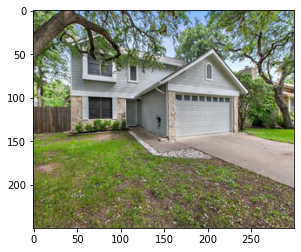

In [26]:
# now we will try to open a random image
import random
import matplotlib.pyplot as plt

a=random.choice(os.listdir(cwd))
print(a)

file = cwd +'/'+a
im = Image.open(file)
#im.show()

plt.imshow(im)
plt.show()

29477637_0a593c71444fb82430b4cbca2b229c50-p_f.jpg


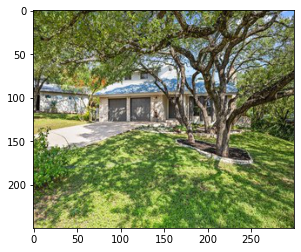

In [28]:
# now we will try to open a random image
a=random.choice(os.listdir(cwd))
print(a)

file = cwd +'/'+a
im = Image.open(file)
#im.show()

plt.imshow(im)
plt.show()

64430924_a694d364d57e1c685277242c1bc6a955-p_f.jpg
JPEG
RGB
(300, 250)


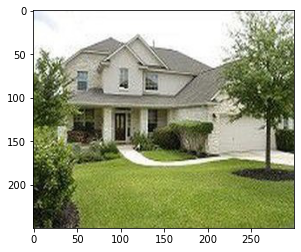

In [31]:
# now we will try to open a random image
a=random.choice(os.listdir(cwd))
print(a)

file = cwd +'/'+a
im = Image.open(file)
#im.show()

print(image.format)
print(image.mode)
print(image.size)

plt.imshow(im)
plt.show()

### Now that images are the same size, Let's try to normalize them
### We have to convert the images into numpy array vectors
https://www.geeksforgeeks.org/how-to-convert-images-to-numpy-array/


In [32]:
from numpy import asarray

resized_dir

'/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles/ResizedHomeImages/'

In [33]:
# using numpy's asarray() function to print the numpy array from each PIL image in the 'resized
# images folder
# checking the code on the first two images
for pic in os.listdir(resized_dir)[:2]:
    img = Image.open(pic)
    numpydata = asarray(img)
    print(pic)
    print(numpydata.shape)
    print(numpydata)

70342475_47ba545f8d30d79930ead321dcbf11cf-p_f.jpg
(250, 300, 3)
[[[230 248 255]
  [224 242 252]
  [224 242 252]
  ...
  [ 42  33  28]
  [ 46  37  32]
  [ 41  30  26]]

 [[223 241 253]
  [218 236 248]
  [218 236 248]
  ...
  [ 30  21  16]
  [ 13   4   0]
  [ 21  10   6]]

 [[221 239 253]
  [216 234 248]
  [216 234 248]
  ...
  [ 34  24  22]
  [ 20  10   8]
  [ 24  14  12]]

 ...

 [[ 81  76  47]
  [ 73  66  38]
  [ 63  53  26]
  ...
  [ 45  43  31]
  [ 46  47  31]
  [ 39  41  20]]

 [[ 88  81  52]
  [ 89  82  54]
  [ 63  53  26]
  ...
  [ 49  46  37]
  [ 49  50  34]
  [ 56  58  37]]

 [[ 93  86  57]
  [108 101  73]
  [ 84  72  46]
  ...
  [ 45  42  33]
  [ 48  49  35]
  [ 55  57  36]]]
29356462_84c5f687b44d9baf99e07c141b2ffe84-p_f.jpg
(250, 300, 3)
[[[ 43  42  37]
  [ 46  45  40]
  [ 41  40  35]
  ...
  [ 41  40  45]
  [ 30  28  31]
  [ 45  41  42]]

 [[ 43  42  37]
  [ 36  35  30]
  [ 42  41  36]
  ...
  [ 68  69  71]
  [ 53  53  53]
  [ 29  28  26]]

 [[ 41  42  36]
  [ 23  24  18]
  